# K-Means Simple Example 1

For this example, we will use the slkearn Python library

#### Problem Statement
Given a set of basketball players with data for points, assists and rebounds, we want to see if there is some grouping among the players

## Step One - Set up the imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Step Two - Import the Data

In [2]:
df = pd.DataFrame({'points': [18, np.nan, 19, 14, 14, 11, 20, 28, 30, 31,
                              35, 33, 29, 25, 25, 27, 29, 30, 19, 23],
                   'assists': [3, 3, 4, 5, 4, 7, 8, 7, 6, 9, 12, 14,
                               np.nan, 9, 4, 3, 4, 12, 15, 11],
                   'rebounds': [15, 14, 14, 10, 8, 14, 13, 9, 5, 4,
                                11, 6, 5, 5, 3, 8, 12, 7, 6, 5]})
print(df.head())


   points  assists  rebounds
0    18.0      3.0        15
1     NaN      3.0        14
2    19.0      4.0        14
3    14.0      5.0        10
4    14.0      4.0         8


## Step Three - Clean and scale the data

Notice that there is a missing measurement and the different features are all scaled differently.

To get a better result, we need to clean and scale the data

1. Drop any rows with a NaN in any column
2. Scale each feature so that it has a mean of 0 and a standard deviation of 1


In [3]:
df = df.dropna()
scaled_df = StandardScaler().fit_transform(df)
print(scaled_df[:5])

[[-0.86660275 -1.22683918  1.72722524]
 [-0.72081911 -0.96077767  1.45687694]
 [-1.44973731 -0.69471616  0.37548375]
 [-1.44973731 -0.96077767 -0.16521285]
 [-1.88708823 -0.16259314  1.45687694]]


## Step Four - Determine the number of clusters

1. Uses the function KMeans(init=’random’, n_clusters=k, n_init=n, random_state=None)
2. This will be run 10 times with different values of k
3. The SSE error values will be saved for each run

In [5]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="random", n_init=10, random_state=1)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

Now evaluate the result looking for elbows

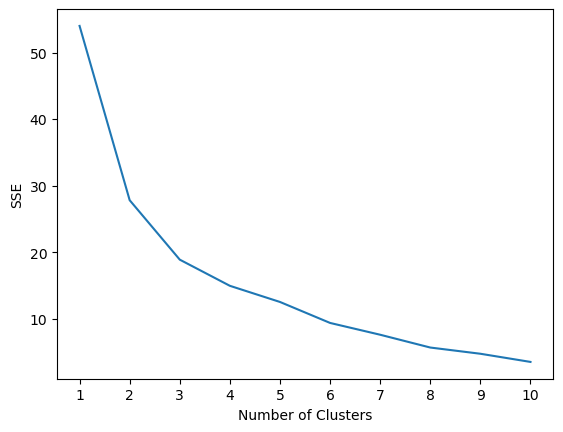

In [6]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

There is an elbow at k=3 so we will use that as the number of clusters and look at the cluster assignemnts

In [8]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=1)
kmeans.fit(scaled_df)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0], dtype=int32)

## Step Five - Display the original data with the cluster assignments


In [9]:
df['cluster'] = kmeans.labels_
print(df)

    points  assists  rebounds  cluster
0     18.0      3.0        15        1
2     19.0      4.0        14        1
3     14.0      5.0        10        1
4     14.0      4.0         8        1
5     11.0      7.0        14        1
6     20.0      8.0        13        1
7     28.0      7.0         9        2
8     30.0      6.0         5        2
9     31.0      9.0         4        0
10    35.0     12.0        11        0
11    33.0     14.0         6        0
13    25.0      9.0         5        0
14    25.0      4.0         3        2
15    27.0      3.0         8        2
16    29.0      4.0        12        2
17    30.0     12.0         7        0
18    19.0     15.0         6        0
19    23.0     11.0         5        0
